In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
def timeit( f ):
  start_time = time.time()
  f()
  end_time = time.time()
  delta = end_time-start_time
  #print( f"The function took {delta} seconds to run" )
  return delta

In [ ]:
def f1( k=100000 ):
  total = 0.0
  for i in range( k ):
    total = total + i**1.1
  return total

In [ ]:
y_vals = []
x_vals = []
for newk in range( 100 ):
  delta = timeit( lambda: f1(k=newk*1000) )
  y_vals.append( delta )
  x_vals.append( newk*1000 )

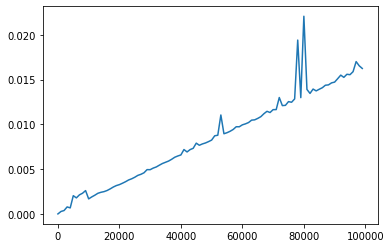

In [ ]:
plt.plot( x_vals, y_vals )

In [ ]:
def regular_pi_estimator( k=1000 ):
  sq_total = 0.0
  circ_total = 0.0
  for _ in range( k ):
    pt = np.random.rand(1,2)
    sq_total += 1.0
    dist = np.sqrt( np.sum(pt*pt) )
    if dist < 1.0:
      circ_total += 1.0
  return (4*circ_total) / sq_total

In [ ]:
def vec_pi_estimator( k=1000 ):
  pts = np.random.rand( k, 2 )

  dists = np.sqrt( np.sum( pts*pts, axis=1 ) )
  circ_total = np.sum( dists < 1.0 )

  sq_total = k

  return 4*circ_total / sq_total

In [ ]:
regular_pi_estimator( k=100000 )

3.14684

In [ ]:
rpe_y_vals = []
rpe_x_vals = []
for newk in tqdm( range( 25 ) ):
  delta = timeit( lambda: regular_pi_estimator(k=(newk+1)*10000) )
  rpe_y_vals.append( delta )
  rpe_x_vals.append( newk*10000 )

100%|██████████| 25/25 [00:49<00:00,  2.00s/it]


In [ ]:
vpe_y_vals = []
vpe_x_vals = []
for newk in tqdm( range( 25 ) ):
  delta = timeit( lambda: vec_pi_estimator(k=(newk+1)*10000) )
  vpe_y_vals.append( delta )
  vpe_x_vals.append( newk*10000 )

100%|██████████| 25/25 [00:00<00:00, 143.83it/s]


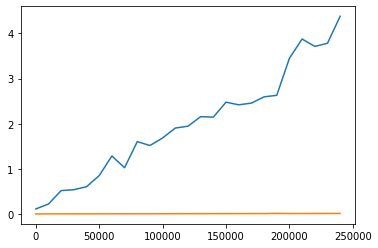

In [ ]:
plt.plot( rpe_x_vals, rpe_y_vals )
plt.plot( vpe_x_vals, vpe_y_vals )